In [4]:
#make word visual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__


'0.6.0'

In [7]:
from konlpy.tag import *

In [8]:
okt = Okt()

In [9]:
from collections import Counter
from wordcloud import WordCloud


def make_plot(txt):
    
    nouns = okt.nouns(txt)
    nouns = [n for n in nouns if len(n) > 1]
    count = Counter(nouns)
    tags = count.most_common(50)
    tags = dict(tags)
    plt.figure(figsize=(10, 10))
    plt.imshow(WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(tags))
    plt.axis('off')
    plt.show()

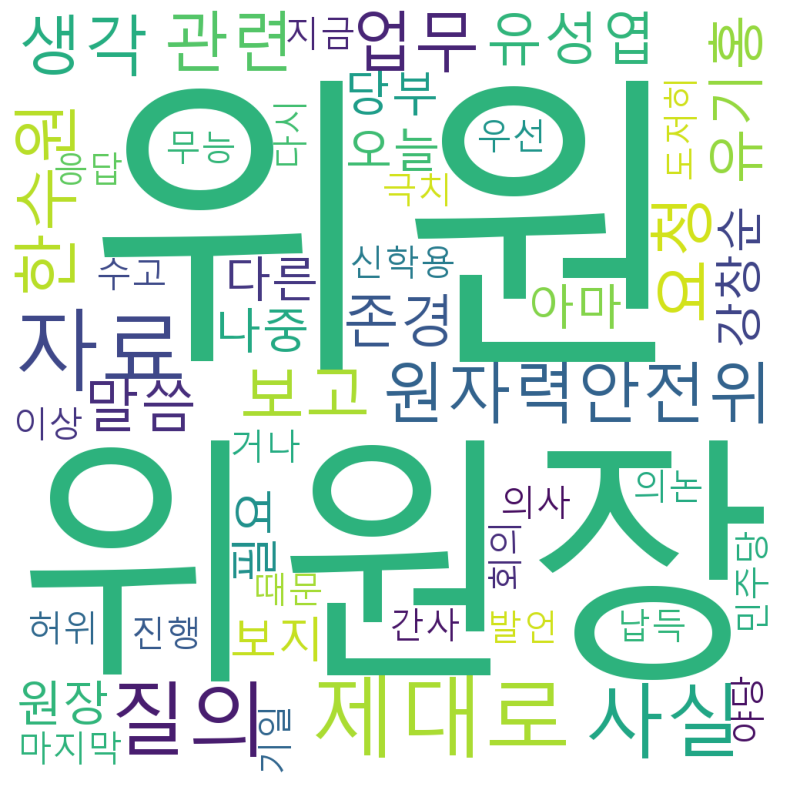

In [12]:
txt_exmple = '"원자력안전위원장 강창순] \"예 알겠습니다.\"\n유성엽 위원] \"이상입니다.\"\n위원장 신학용] \"유성엽 위원님 수고하셨습니다.   마지막으로 유기홍 간사님 질의해 주세요.\"\n유기홍 위원] \"제가 제 질의 전에 간단하게 의사진행발언 하고 하도록 하겠습니다.   사실은 다른 위원님들은 어떻게 생각하실지 모르겠지만 저는 오늘 제대로 된 업무보고와 질의가 이루어지지 않았다고 생각합니다. 심각한 허위 보고이거나 아니면 무능의 극치이거나 도저히 납득할 수 없는 질의응답들이 지금 이루어지고 있다는 점을 말씀드리고 이것은 민주당 우선 야당 위원님들과 의논을 해서 저는 오늘로 제대로 된 업무보고가 되지 않았기 때문에 다시 기일을 잡아서 해야 될 필요도 느낀다는 점을 말씀드리고요.  아까 존경하는 유성엽 위원님의 회의록 관련 요구에 응하지 않으셨다면 제가 위원장님께 이것은 법에 따라서 규칙을 개정하도록 요청드릴 생각이었는데 다행스럽게 위원장께서 하겠다고 말씀하신 거지요 그 점은?\"\n원자력안전위원장 강창순] \"그렇습니다.\"\n유기홍 위원] \"그것은 나중에 좀 확인해 주시기를 당부드리고요.  또 하나 말씀을 드리면 존경하는 정진후 위원께서 요청하신 자료가 한수원 관련 자료는 아마 위원회 의결을 필요로 하는 모양입니다. 이것은 위원장님께 요청드리는 것인데 사실은 한수원 자료를 제대로 받아 보지 않고 원자력안전위원회 업무보고나 이런 것들을 제대로 할 수가 없습니다.   그래서 한수원 관련된 자료에 대해서는 우리 여야 합의로 좀 자료 요청을 할 수 있도록…… 이것은 아마 다른 위원님들도 동의하실 텐데요. 한수원 자료를 제대로 받아 보지 못한다면 원자력안전위원회에 대한 보고라든지 나중에 국정감사를 또 하게 될 텐데 그 점 관련해서는 위원장께서 적극적으로 배려해 주실 것을 당부드리겠습니다.  이어서 제 질의를 드리도록 하겠습니다.   말씀드렸듯이 정말 실망스럽다는 말씀을 먼저 드리고 싶습니다.   그런데 아까 존경하는 유은혜 위원께서도 지적을 하셨지만 사실은 위원장님이 그동안 걸어오신 길을 보면 어찌 보면 당연하다는 생각도 드는 것이 사실입니다.  위원장님 작년 10월 26일 독립행정기관으로 만들어져서 사실상 제대로 된 첫 국회 업무보고일 텐데 힘들고 굉장히 곤혹스러우시지요?\"\n"'
make_plot(txt_exmple)

In [13]:
from keybert import KeyBERT

In [14]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(txt_exmple)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [15]:
keywords

[('의사진행발언', 0.555),
 ('독립행정기관으로', 0.5452),
 ('동의하실', 0.5272),
 ('요청하신', 0.5205),
 ('생각하실지', 0.5189)]

In [16]:
kw_model.extract_keywords(txt_exmple, keyphrase_ngram_range=(1, 1), stop_words=None)

[('의사진행발언', 0.555),
 ('독립행정기관으로', 0.5452),
 ('동의하실', 0.5272),
 ('요청하신', 0.5205),
 ('생각하실지', 0.5189)]

In [18]:
kw_model.extract_keywords(txt_exmple, keyphrase_ngram_range=(1, 2), stop_words=None)

[('업무보고와 질의가', 0.6238),
 ('독립행정기관으로 만들어져서', 0.5927),
 ('의사진행발언 하고', 0.5804),
 ('무능의 극치이거나', 0.5727),
 ('나중에 확인해', 0.5715)]

In [19]:
keywords = kw_model.extract_keywords(txt_exmple, highlight=True)

원자력안전위원장 강창순 알겠습니다 유성엽 위원 이상입니다 위원장 신학용 유성엽 위원님 수고하셨습니다 마지막으로 
유기홍 간사님 질의해 주세요 유기홍 위원 제가 질의 전에 간단하게 의사진행발언 하고 하도록 하겠습니다 사실은 다른 
위원님들은 어떻게 생각하실지 모르겠지만 저는 오늘 제대로 업무보고와 질의가 이루어지지 않았다고 생각합니다 심각한 
허위 보고이거나 아니면 무능의 극치이거나 도저히 납득할 없는 질의응답들이 지금 이루어지고 있다는 점을 말씀드리고 
이것은 민주당 우선 야당 위원님들과 의논을 해서 저는 오늘로 제대로 업무보고가 되지 않았기 때문에 다시 기일을 잡아서 
해야 필요도 느낀다는 점을 말씀드리고요 아까 존경하는 유성엽 위원님의 회의록 관련 요구에 응하지 않으셨다면 제가 
위원장님께 이것은 법에 따라서 규칙을 개정하도록 요청드릴 생각이었는데 다행스럽게 위원장께서 하겠다고 말씀하신 
거지요 점은 원자력안전위원장 강창순 그렇습니다 유기홍 위원 그것은 나중에 확인해 주시기를 당부드리고요 하나 말씀을 
드리면 존경하는 정진후 위원께서 요청하신 자료가 한수원 관련 자료는 아마 위원회 의결을 필요로 하는 모양입니다 이것은
위원장님께 요청드리는 것인데 사실은 한수원 자료를 제대로 받아 보지 않고 원자력안전위원회 업무보고나 이런 것들을 
제대로 수가 없습니다 그래서 한수원 관련된 자료에 대해서는 우리 여야 합의로 자료 요청을 있도록 이것은 아마 다른 
위원님들도 동의하실 텐데요 한수원 자료를 제대로 받아 보지 못한다면 원자력안전위원회에 대한 보고라든지 나중에 
국정감사를 하게 텐데 관련해서는 위원장께서 적극적으로 배려해 주실 것을 당부드리겠습니다 이어서 질의를 드리도록 
하겠습니다 말씀드렸듯이 정말 실망스럽다는 말씀을 먼저 드리고 싶습니다 그런데 아까 존경하는 유은혜 위원께서도 지적을
하셨지만 사실은 위원장님이 그동안 걸어오신 길을 보면 어찌 보면 당연하다는 생각도 드는 것이 사실입니다 위원장님 작년
10월 26일 독립행정기관으로 만들어져서 사실상 제대로 국회 업무보고일 텐데 힘들고 굉장히 곤혹스러우시지요